### Notebook Summary

In this notebook, we locally loaded the `data_token.csv` file from our S3 bucket directly into a pandas DataFrame, saved a local copy, and confirmed basic info. We then profiled the full timeline and created cleaner visualizations by restricting to consecutive-year windows (1742+ and 1800+). This made trends in appearances of the word "data" clearer: rapid growth in `frequency`/`pages`, steadier growth in `books`, peaks in the 1980s/1990s, and a noticeable decline in the 2000s. Lastly, to probe that dip we zoomed in on 1980–2008 and confirmed a drop across all columns, especially in the final few years.

### Preliminaries

In [57]:
# Run once if necessary

%pip install s3fs

In [58]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt

In [59]:
# Read data from my bucket

s3_path = "s3://eshelburne-bstn-bucket/ngrams/data_token.csv"

# s3fs uses AWS CLI credentials automatically
df = pd.read_csv(s3_path)

In [60]:
# Save locally for convenience

local_path = f"C:/Users/emshe/Desktop/BRAINSTATION/BIG_DATA_WRANGLING_PROJECT"

df.to_csv(f"{local_path}/data_token.csv", index = False)

In [61]:
# Helper plotting functions

def line_plot(df, col):
    plt.figure()
    plt.plot(df["year"], df[col])
    plt.title(f'Occurrences of token "data" over time (by {col.title()})')
    plt.xlabel("Year")
    plt.ylabel(col.title())
    plt.tight_layout()
    plt.show()

def all_cols_vs_year(df):
    for col in df.columns:
        if col != 'year':
            line_plot(df,col)
            print('\n\n')

### Inspect data

In [62]:
# Check shape of dataframe

print(f"The shape of the dataframe is {df.shape}.")

The shape of the dataframe is (316, 4).


In [63]:
# Check head

display(df.head())

,year,frequency,pages,books
0,1584,16,14,1
1,1614,3,2,1
2,1627,1,1,1
3,1631,22,18,1
4,1637,1,1,1


In [64]:
# Check df's info

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   year       316 non-null    int64
 1   frequency  316 non-null    int64
 2   pages      316 non-null    int64
 3   books      316 non-null    int64
dtypes: int64(4)
memory usage: 10.0 KB


None

As expected, our dataframe has been correctly loaded with 316 records, 4 fields, and no null values.

In [65]:
# Check df's statistical summary

display(df.describe())

,year,frequency,pages,books
count,316.000000,316.000000,316.000000,316.000000
mean,1847.569620,38555.993671,21711.041139,1493.110759
std,96.874382,69212.366418,34901.797740,1560.040802
min,1584.000000,1.000000,1.000000,1.000000
25%,1771.750000,20.750000,19.000000,11.750000
50%,1850.500000,3004.000000,2729.500000,868.000000
75%,1929.250000,41776.750000,30195.750000,2964.250000
max,2008.000000,254561.000000,122472.000000,4372.000000


Our dataset spans 1584–2008 with 316 year-records (evidently, there are many missing years). Early coverage is especially sparse (25th percentile year is 1772), and counts are highly skewed (``frequency`` median 3,004 vs. mean 38,556). These gaps make the early part our data unwieldy and difficult to interpret, so we restrict to the oldest consecutive run of years to produce a clean, gap-free trend for plotting and analysis.

In [66]:
# Check for missing years

min_year, max_year = df["year"].min(), df["year"].max()
years_present = set(df["year"])

missing_years = sorted(set(range(min_year,max_year+1)) - years_present)

print(f"Number of missing years is {len(missing_years)}.")

last_missing = max(missing_years)

print(f"The most recent missing year is {last_missing}.")


Number of missing years is 109.
The most recent missing year is 1741.


In [67]:
# Restrict dataframe so that the complete range of consecutive years is present

consec_df = df[df['year']>1741]

display(consec_df.head())

,year,frequency,pages,books
49,1742,5,4,4
50,1743,5,5,5
51,1744,1,1,1
52,1745,2,2,2
53,1746,3,3,2


In [68]:
# Examine stats for new dataframe

display(consec_df.describe())

,year,frequency,pages,books
count,267.000000,267.000000,267.000000,267.000000
mean,1875.000000,45630.996255,25694.734082,1766.786517
std,77.220464,73135.240166,36603.278944,1548.292857
min,1742.000000,1.000000,1.000000,1.000000
25%,1808.500000,342.500000,325.000000,158.500000
50%,1875.000000,6535.000000,5890.000000,1429.000000
75%,1941.500000,57313.500000,39500.000000,3260.500000
max,2008.000000,254561.000000,122472.000000,4372.000000


Restricting to the first gap-free run yields the year range 1742–2008 with 267 annual records. All columns are still right-skewed. Note, however, that the `books` column is markedly less skewed than `frequency` and `pages` (median 1,429 vs. mean 1,767 for `books`, compared with medians 6,535/5,890 vs. means 45,631/25,695 for `frequency` / `pages` respectively). The minimum is 1 for all columns, which is negligible and corresponds to trivial years. In order to avoid those edge cases and align with the assignment’s focus on the 1800s onward, we further restrict the dataframe to start at 1800.

In [69]:
# Restrict further to 1800s and on

modern_df = consec_df[consec_df['year']>= 1800]

display(modern_df.head())

,year,frequency,pages,books
107,1800,175,172,87
108,1801,256,246,134
109,1802,118,115,59
110,1803,274,271,157
111,1804,336,320,144


In [70]:
# Examine stats for new dataframe

display(modern_df.describe())

,year,frequency,pages,books
count,209.000000,209.000000,209.000000,209.000000
mean,1904.000000,58283.980861,32816.282297,2252.521531
std,60.477268,78100.568410,38455.231187,1405.080866
min,1800.000000,118.000000,115.000000,59.000000
25%,1852.000000,3411.000000,2903.000000,906.000000
50%,1904.000000,15051.000000,12399.000000,2249.000000
75%,1956.000000,85048.000000,55061.000000,3580.000000
max,2008.000000,254561.000000,122472.000000,4372.000000


Limiting to 1800–2008 yields 209 annual records with substantially fewer edge cases. The minima are now non-trivial (`frequency` 118, `pages` 115, `books` 59), avoiding the sparse early years. The `frequency` and `pages` counts are still quite right skewed (e.g. `frequency` median 15,051 vs. mean 58,284), but the median and mean for `books` are approximately equal (both around 2250), suggesting a fairly symmetric distribution. Overall, this window removes noisy low-count years and produces a cleaner, more interpretable line chart for the token’s usage over time.

### Visualizations of Full Dataset

In the below cell, we visualize the full dataset over time, before restricting the year range.

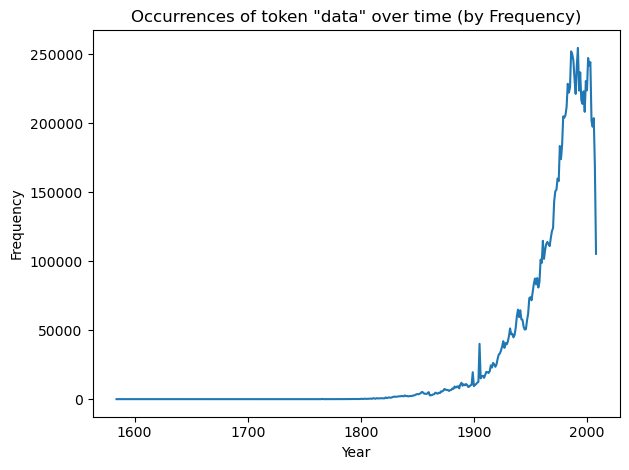

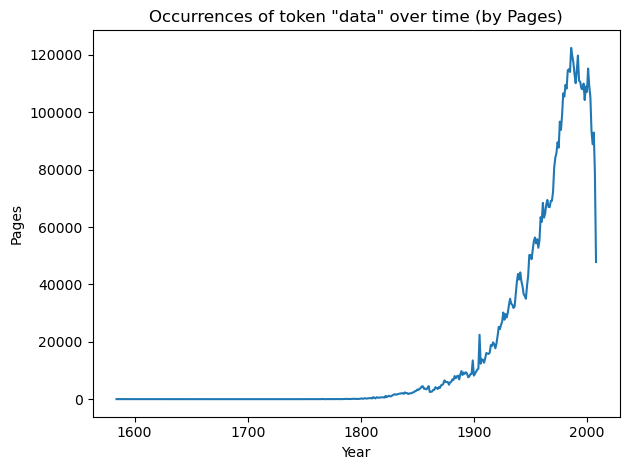

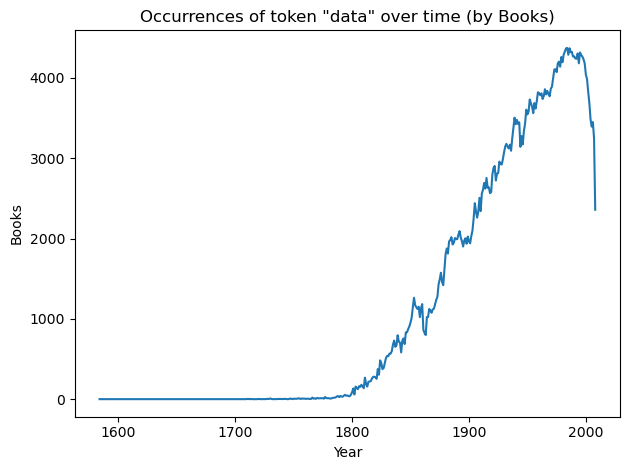

In [71]:
# Plot occurrences of the token "data" over time

all_cols_vs_year(df)

Across the full timeline (1500s–2008), all counts are predictably very low until the early 1800s. From there, both `frequency` and `pages` climb steeply, with an apparent peak in the 1990s. The rise in `books` begins earlier and increases more gradually, but its overall shape is comparable to the others. Interestingly, all three metrics dip in the 2000s; we’ll investigate that decline in more detail later in the notebook.


### Visualizations of Dataset Post 1741

In the below cell, we plot all columns vs. time after restricting to a year range with all consecutive years present in the data.

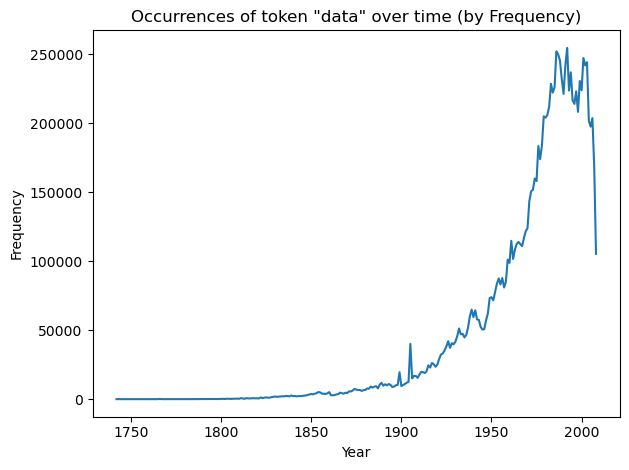

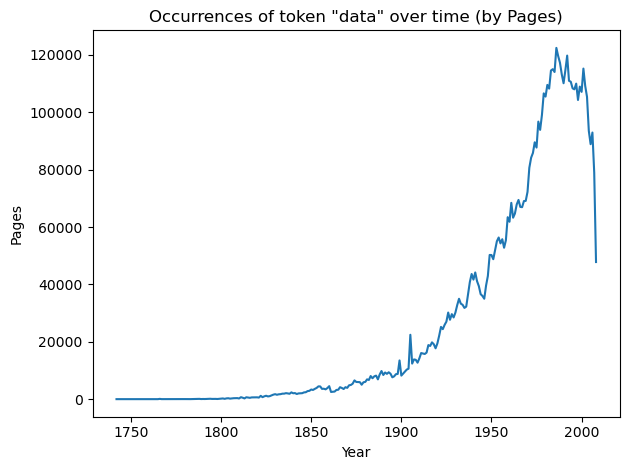

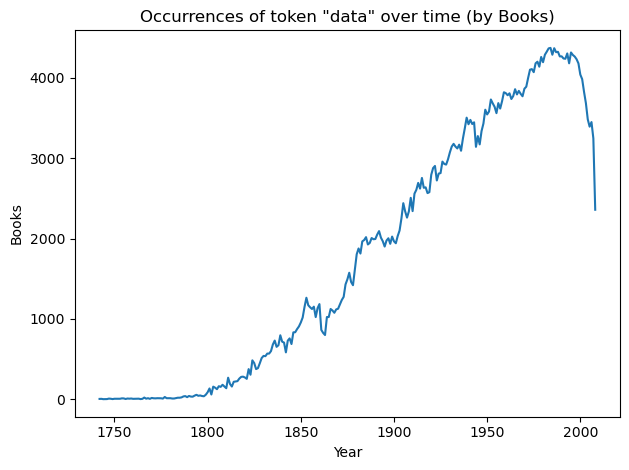

In [72]:
# Plot occurrences of the token "data" over time post 1741

all_cols_vs_year(consec_df)

From 1742 onward (with all consecutive years present), the overall shapes match the full-range plots but with the long left-tail of negligible values removed. As a result, the visualizations are cleaner and more readable, making fluctuations easier to spot (such as the small early-1900s spike in `frequency` and `pages`).


### Visualizations of Dataset from 1800-2008

Below, we plot the dataset from the year 1800 and on, in order to remove all negligible columns values in early years.

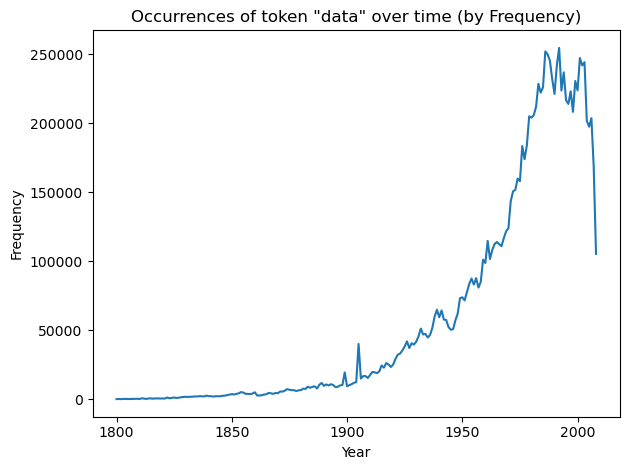

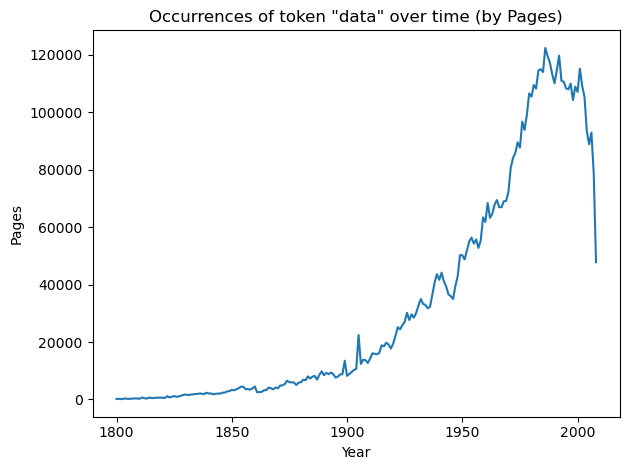

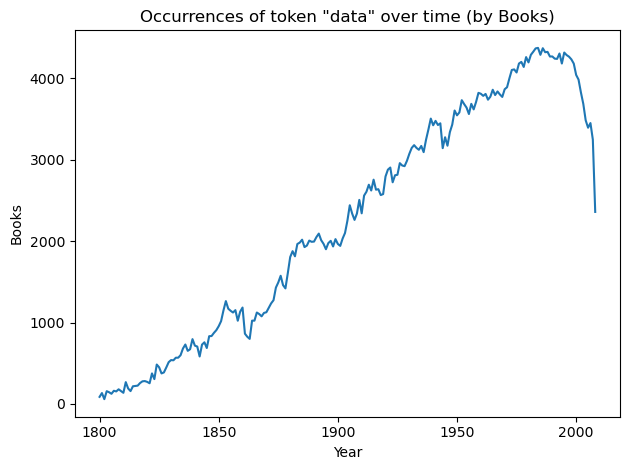

In [73]:
# Plot occurrences of the token "data" over time post 1799

all_cols_vs_year(modern_df)

In the 1800–2008 view, the rise in all counts clearly begins in the early 1800s. The columns `frequency` and `pages` grow roughly exponentially through the 19th–20th centuries, while `books` increases approximately linearly; all three exhibit year-to-year fluctuations. Each series appears to peak toward the end of the 20th century, followed by a sharp decline in the early 2000s.

### Visualizations of Dataset from 1980-2008

Lastly, in order to investigate the apparent decline in mentions of the word "data" in the 2000s, we examine our line plot in the short time window from 1980 to 2008.

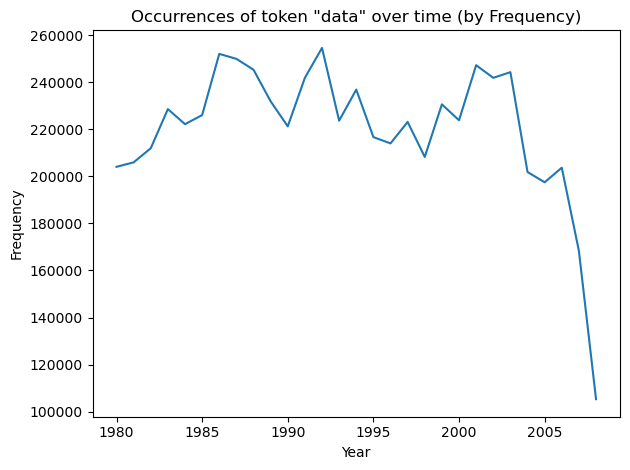

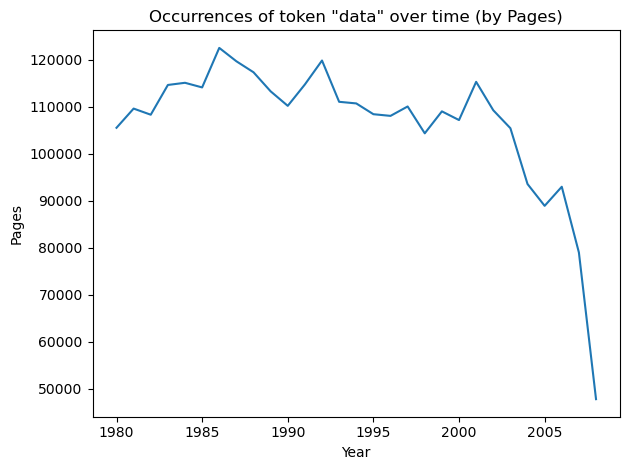

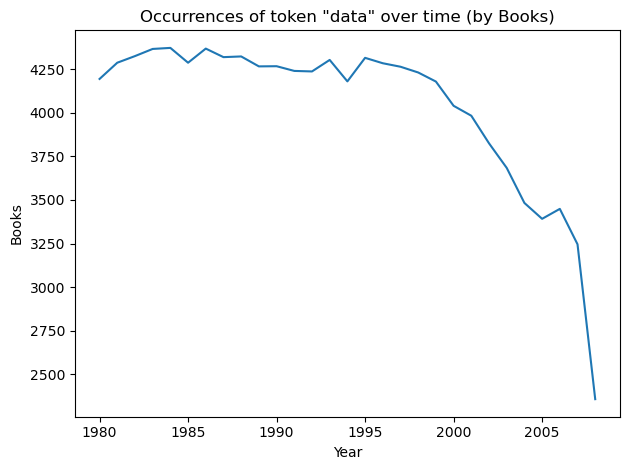

In [74]:
# Plot occurrences of the token "data" over time post 1979

since_80s = modern_df[modern_df['year']>1979]

all_cols_vs_year(since_80s)

With the above visualizations, we confirm there is a drop in the counts for all columns in the early 2000s (although the decline for the `books` column is less steep). The drop is especially extreme in the last few years, leading us to question whether there may be less data for years such as 2007 and 2008. Determining whether this might explain the decline in appearances of the word "data" would require careful analysis with the full dataset again.